In [2]:
import os
import glob
import geopandas as gpd
import contextily as ctx
from asp_plot.altimetry import Altimetry

In [ ]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
try:
    aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]
except:
    aligned_dem_fn = None

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [ ]:
try:
    atl06sr = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_all.parquet"))
    atl06sr_filtered = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_filtered.parquet"))

    icesat = Altimetry(
        dem_fn=dem_fn, 
        aligned_dem_fn=aligned_dem_fn,
        atl06sr=atl06sr,
        atl06sr_filtered=atl06sr_filtered
    )
except:
    print("No existing ATL06 files found. You'll need to re-request")
    icesat = Altimetry(dem_fn=dem_fn, aligned_dem_fn=aligned_dem_fn)

In [ ]:
if icesat.atl06sr is None:
    icesat.pull_atl06sr(
        esa_worldcover=True,
        filename=os.path.join(icesat_directory, "atl06sr_defaults_all"),
        parms=None,
    )

icesat.atl06sr

,n_fit_photons,spot,y_atc,x_atc,rgt,gt,h_mean,dh_fit_dx,cycle,h_sigma,pflags,region,rms_misfit,w_surface_window_final,segment_id,geometry,esa_worldcover.time,esa_worldcover.flags,esa_worldcover.value,esa_worldcover.file_id
time,,,,,,,,,,,,,,,,,,,,
2018-11-20 23:50:33.459589376,10,1,-4467.259766,7950044.5,815,60,8.783496,0.002570,1,0.064915,0,3,0.134788,3.000000,396648,POINT (-156.68342 71.2681),1.309046e+12,0,90.0,601295421440
2018-11-20 23:50:33.527074048,15,3,-1218.220337,7950425.0,815,40,12.821935,0.003775,1,0.027440,0,3,0.093223,3.000000,396667,POINT (-156.77463 71.26773),1.309046e+12,0,30.0,601295421440
2018-11-20 23:50:33.530016768,13,3,-1218.214722,7950445.0,815,40,12.912689,0.004168,1,0.039577,0,3,0.099579,3.000000,396668,POINT (-156.77471 71.26792),1.309046e+12,0,30.0,601295421440
2018-11-20 23:50:33.532833792,11,3,-1218.210327,7950465.0,815,40,13.087043,0.007202,1,0.045450,0,3,0.146518,3.000000,396669,POINT (-156.77478 71.26809),1.309046e+12,0,30.0,601295421440
2018-11-20 23:50:33.535680000,15,3,-1218.213501,7950485.0,815,40,13.246701,0.002723,1,0.034577,0,3,0.131781,3.000000,396670,POINT (-156.77485 71.26827),1.309046e+12,0,30.0,601295421440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:10.995255296,14,5,3226.183594,12120135.0,381,20,3.464851,-0.001165,23,0.078120,0,5,0.264175,3.000000,605068,POINT (-156.61288 71.26838),1.309046e+12,0,90.0,597000454144
2024-04-12 14:33:10.998089984,20,5,3226.091064,12120155.0,381,20,3.431344,-0.003981,23,0.055120,0,5,0.242453,3.000000,605069,POINT (-156.61295 71.2682),1.309046e+12,0,90.0,597000454144
2024-04-12 14:33:11.000924160,17,5,3225.997803,12120175.0,381,20,3.488348,0.008699,23,0.055067,0,5,0.223190,3.000000,605070,POINT (-156.61303 71.26803),1.309046e+12,0,90.0,597000454144


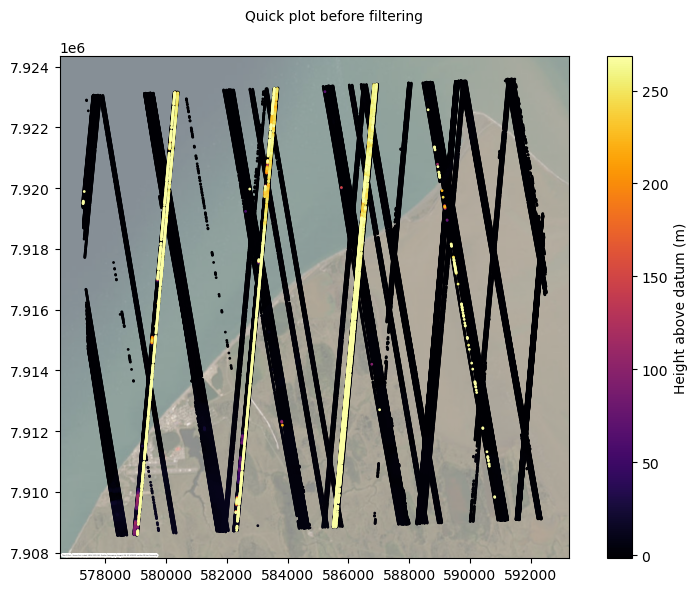

In [ ]:
icesat.plot_atl06sr(
    title="Quick plot before filtering",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    **ctx_kwargs
)

In [ ]:
# Filter data down
if icesat.atl06sr_filtered is None:
    icesat.filter_atl06sr(
        h_sigma_quantile=0.95,
        mask_worldcover_water=True,
        select_months=[4],
        select_years=[2022],
        filename=os.path.join(icesat_directory, "atl06sr_defaults_filtered"),
    )

icesat.atl06sr_filtered

,n_fit_photons,spot,y_atc,x_atc,rgt,gt,h_mean,dh_fit_dx,cycle,h_sigma,pflags,region,rms_misfit,w_surface_window_final,segment_id,geometry,esa_worldcover.time,esa_worldcover.flags,esa_worldcover.value,esa_worldcover.file_id
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210849792,93,1,3311.713135,12110909.0,381,10,-0.341876,-0.020158,15,0.054879,0,5,0.183663,3.0,604607,POINT (-156.57677 71.35026),1.309046e+12,0,60.0,309237645312
2022-04-17 01:15:56.213662464,233,1,3311.738525,12110929.0,381,10,-0.466327,0.021334,15,0.014196,0,5,0.201344,3.0,604608,POINT (-156.57684 71.35008),1.309046e+12,0,50.0,309237645312
2022-04-17 01:15:56.467528960,397,1,3309.855713,12112730.0,381,10,-0.324278,0.009540,15,0.007755,0,5,0.154314,3.0,604698,POINT (-156.5835 71.33408),1.309046e+12,0,90.0,309237645312
2022-04-17 01:15:56.470364928,370,1,3309.832031,12112750.0,381,10,-0.193495,0.005028,15,0.007654,0,5,0.147074,3.0,604699,POINT (-156.58357 71.3339),1.309046e+12,0,90.0,309237645312
2022-04-17 01:15:56.473200128,368,1,3309.790283,12112770.0,381,10,-0.114474,0.003891,15,0.006003,0,5,0.115157,3.0,604700,POINT (-156.58365 71.33372),1.309046e+12,0,90.0,309237645312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17 01:15:57.719849728,72,6,-3313.918701,12119394.0,381,60,10.424692,-0.006849,15,0.018753,0,5,0.153063,3.0,605031,POINT (-156.79114 71.28253),1.309046e+12,0,100.0,309237645312
2022-04-17 01:15:57.722661120,85,6,-3313.976074,12119414.0,381,60,10.358472,0.000286,15,0.015511,0,5,0.142104,3.0,605032,POINT (-156.79121 71.28235),1.309046e+12,0,100.0,309237645312
2022-04-17 01:15:57.725475328,82,6,-3314.024170,12119434.0,381,60,10.315920,-0.002977,15,0.013112,0,5,0.117638,3.0,605033,POINT (-156.79129 71.28218),1.309046e+12,0,90.0,309237645312


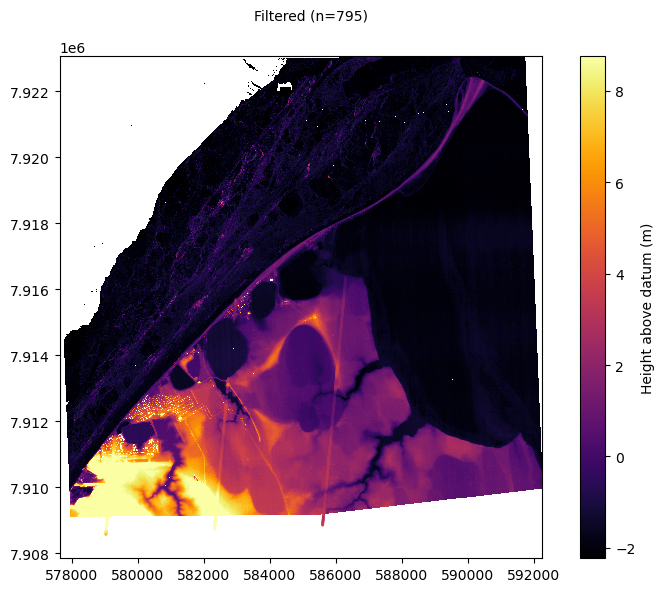

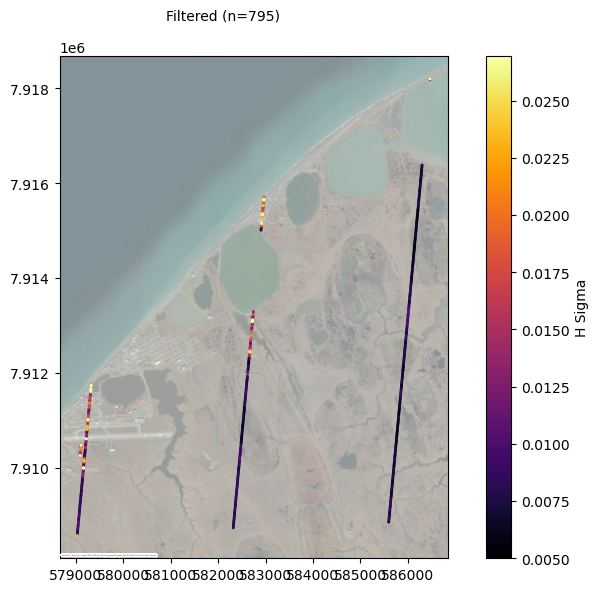

In [ ]:
icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    plot_dem=True,
    **ctx_kwargs
)

icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    column_name="h_sigma",
    cbar_label="H Sigma",
    **ctx_kwargs
)

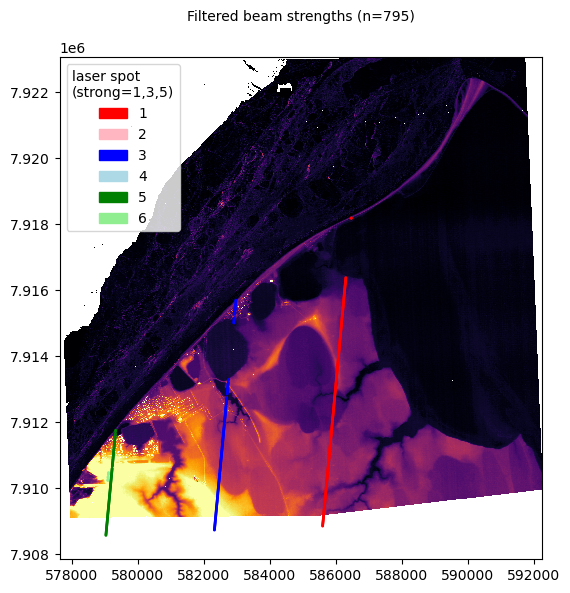

In [ ]:
icesat.plot_atl06sr(
    title=f"Filtered beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    plot_dem=True,
    map_crs=map_crs,
    **ctx_kwargs
)

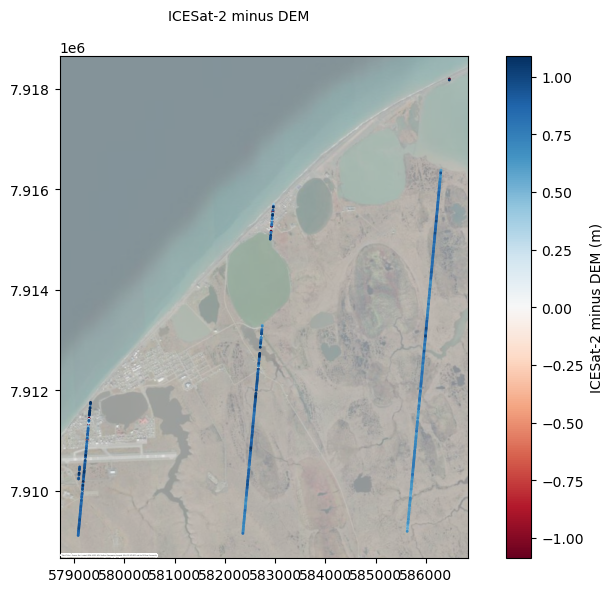

In [ ]:
icesat.mapview_plot_atl06sr_to_dem(
    title="ICESat-2 minus DEM",
    **ctx_kwargs
)

In [ ]:
# Previous mismatch indicates need for pc_align step
icesat.pc_align_dem_to_atl06sr(
    atl06sr_csv=os.path.join(icesat_directory, "atl06sr_defaults_filtered.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

Aligned DEM was already supplied: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated.tif

Please use that, or remove this file before running pc_align.



In [ ]:
# Report
report = icesat.pc_align_report(
    pc_align_folder=os.path.join(directory, "pc_align")
)
print(report)

Input: error percentile of smallest errors (meters): 16%: 0.633969, 50%: 0.790307, 84%: 0.918597
Input: mean of smallest errors (meters): 25%: 0.577857, 50%: 0.65753, 75%: 0.715642, 100%: 0.855328
Output: error percentile of smallest errors (meters): 16%: 0.0302904, 50%: 0.0944924, 84%: 0.208051
Output: mean of smallest errors (meters): 25%: 0.0229895, 50%: 0.0470284, 75%: 0.0736527, 100%: 0.23137
Translation vector (Cartesian, meters): Vector3(0.4888486,-0.011891315,-0.67711856)
Translation vector magnitude (meters): 0.83522685



In [ ]:
# SLOW: uses point2dem
# icesat.generate_translated_dem(
#     pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
#     dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
# )

icesat.apply_dem_translation(
    pc_align_folder=os.path.join(directory, "pc_align"),
)


Aligned DEM already exists: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated.tif

Please use that, or remove this file before running pc_align.



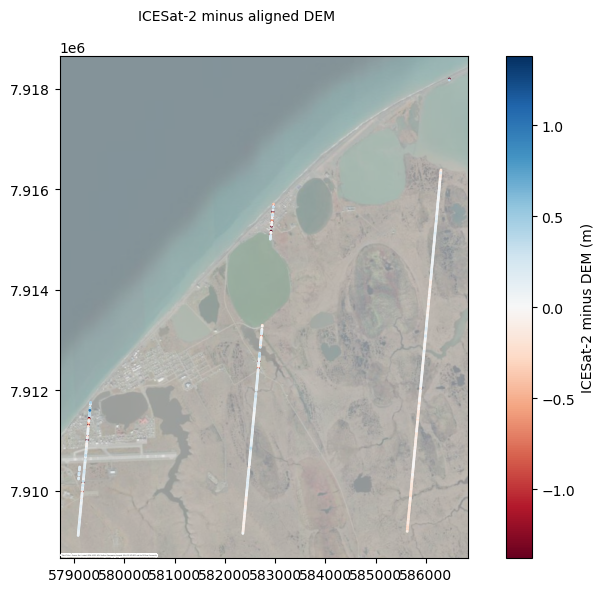

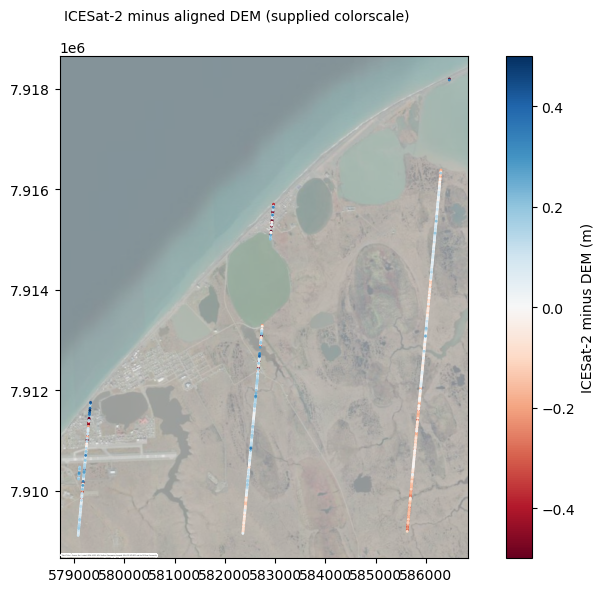

In [ ]:
# Quickly compare the translated DEM to the ATL06 data
icesat.mapview_plot_atl06sr_to_dem(
    title="ICESat-2 minus aligned DEM",
    plot_aligned=True, 
    **ctx_kwargs
)

icesat.mapview_plot_atl06sr_to_dem(
    title="ICESat-2 minus aligned DEM (supplied colorscale)",
    clim=(-0.5, 0.5),
    plot_aligned=True,
    **ctx_kwargs
)

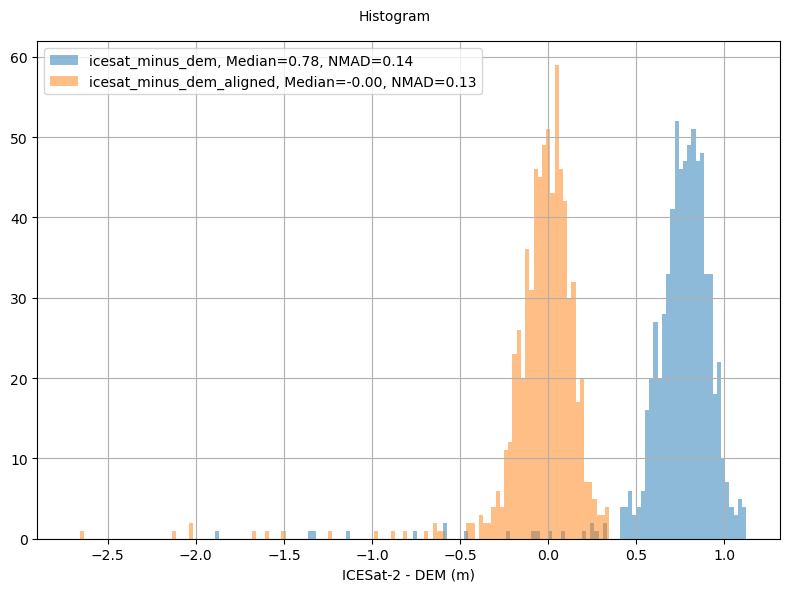

In [ ]:
# Show a quick histogram
icesat.histogram(plot_aligned=True)

In [ ]:
# Gather a larger subset of data for validation
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=False,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_parquet=False,
    filename=os.path.join(icesat_directory, "atl06sr_filtered_noWaterMask_MarchAprilMay_allTime_for_validation"),
)

,n_fit_photons,spot,y_atc,x_atc,rgt,gt,h_mean,dh_fit_dx,cycle,h_sigma,pflags,region,rms_misfit,w_surface_window_final,segment_id,geometry,esa_worldcover.time,esa_worldcover.flags,esa_worldcover.value,esa_worldcover.file_id
time,,,,,,,,,,,,,,,,,,,,
2019-04-18 16:42:25.761399040,368,3,4860.420410,7951107.5,312,30,-1.092122,-0.001181,3,0.007228,0,3,0.138572,3.000000e+00,396697,POINT (-156.42618 71.26678),1.309046e+12,0,80.0,304942678016
2019-04-18 16:42:25.764203008,396,3,4860.357910,7951127.5,312,30,-0.979065,0.011814,3,0.007493,0,3,0.149115,3.000000e+00,396698,POINT (-156.42625 71.26696),1.309046e+12,0,80.0,304942678016
2019-04-18 16:42:25.767010304,392,3,4860.284668,7951147.5,312,30,-0.431788,0.042057,3,0.011045,0,3,0.218605,2.817802e+30,396699,POINT (-156.42632 71.26713),1.309046e+12,0,80.0,304942678016
2019-04-18 16:42:25.769823232,372,3,4860.202148,7951167.5,312,30,0.645327,0.064466,3,0.011365,0,3,0.219176,2.817802e+30,396700,POINT (-156.42639 71.26731),1.309046e+12,0,90.0,304942678016
2019-04-18 16:42:25.772640256,385,3,4860.123047,7951187.5,312,30,1.590375,0.030980,3,0.011662,0,3,0.228806,3.000000e+00,396701,POINT (-156.42646 71.26749),1.309046e+12,0,30.0,304942678016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:10.986774016,27,5,3226.350586,12120075.0,381,20,3.347771,0.006871,23,0.040197,0,5,0.187212,3.000000e+00,605065,POINT (-156.61265 71.26891),1.309046e+12,0,90.0,597000454144
2024-04-12 14:33:10.989595904,15,5,3226.320801,12120095.0,381,20,3.411844,0.004875,23,0.043580,0,5,0.167843,3.000000e+00,605066,POINT (-156.61273 71.26874),1.309046e+12,0,90.0,597000454144
2024-04-12 14:33:10.992423424,11,5,3226.265869,12120115.0,381,20,3.452427,0.005191,23,0.041516,0,5,0.133545,3.000000e+00,605067,POINT (-156.6128 71.26856),1.309046e+12,0,90.0,597000454144


In [ ]:
# recalculate dh with newly filtered points
icesat.atl06sr_to_dem_dh()

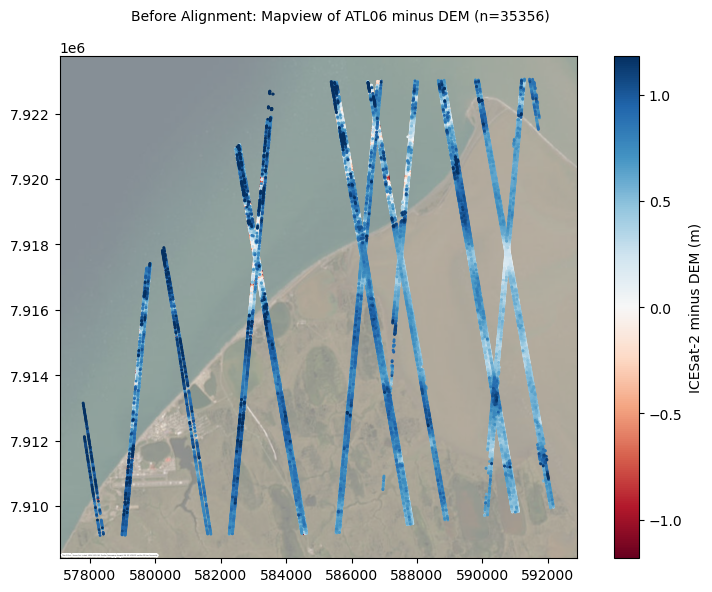

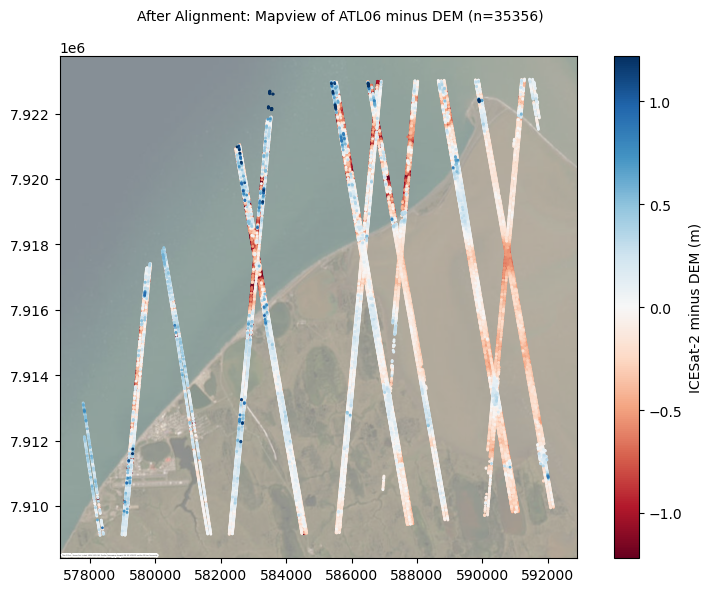

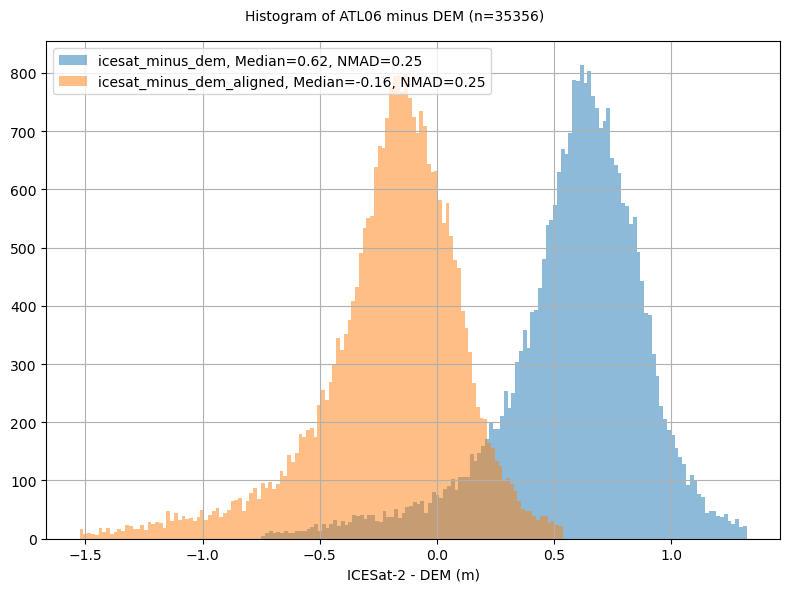

In [ ]:
# Validate (before and after)
icesat.mapview_plot_atl06sr_to_dem(
    title=f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})",
    plot_aligned=False, 
    **ctx_kwargs
)

icesat.mapview_plot_atl06sr_to_dem(
    title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})",
    plot_aligned=True, 
    **ctx_kwargs
)

icesat.histogram(
    title=f"Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})",
    plot_aligned=True
)

In [ ]:
# Collect only the coincident filtereded data again for profile plotting
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    save_to_csv=False,
    select_months=[4],
    select_years=[2022],
)

,n_fit_photons,spot,y_atc,x_atc,rgt,gt,h_mean,dh_fit_dx,cycle,h_sigma,pflags,region,rms_misfit,w_surface_window_final,segment_id,geometry,esa_worldcover.time,esa_worldcover.flags,esa_worldcover.value,esa_worldcover.file_id
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210849792,93,1,3311.713135,12110909.0,381,10,-0.341876,-0.020158,15,0.054879,0,5,0.183663,3.0,604607,POINT (-156.57677 71.35026),1.309046e+12,0,60.0,309237645312
2022-04-17 01:15:56.213662464,233,1,3311.738525,12110929.0,381,10,-0.466327,0.021334,15,0.014196,0,5,0.201344,3.0,604608,POINT (-156.57684 71.35008),1.309046e+12,0,50.0,309237645312
2022-04-17 01:15:56.467528960,397,1,3309.855713,12112730.0,381,10,-0.324278,0.009540,15,0.007755,0,5,0.154314,3.0,604698,POINT (-156.5835 71.33408),1.309046e+12,0,90.0,309237645312
2022-04-17 01:15:56.470364928,370,1,3309.832031,12112750.0,381,10,-0.193495,0.005028,15,0.007654,0,5,0.147074,3.0,604699,POINT (-156.58357 71.3339),1.309046e+12,0,90.0,309237645312
2022-04-17 01:15:56.473200128,368,1,3309.790283,12112770.0,381,10,-0.114474,0.003891,15,0.006003,0,5,0.115157,3.0,604700,POINT (-156.58365 71.33372),1.309046e+12,0,90.0,309237645312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17 01:15:57.719849728,72,6,-3313.918701,12119394.0,381,60,10.424692,-0.006849,15,0.018753,0,5,0.153063,3.0,605031,POINT (-156.79114 71.28253),1.309046e+12,0,100.0,309237645312
2022-04-17 01:15:57.722661120,85,6,-3313.976074,12119414.0,381,60,10.358472,0.000286,15,0.015511,0,5,0.142104,3.0,605032,POINT (-156.79121 71.28235),1.309046e+12,0,100.0,309237645312
2022-04-17 01:15:57.725475328,82,6,-3314.024170,12119434.0,381,60,10.315920,-0.002977,15,0.013112,0,5,0.117638,3.0,605033,POINT (-156.79129 71.28218),1.309046e+12,0,90.0,309237645312


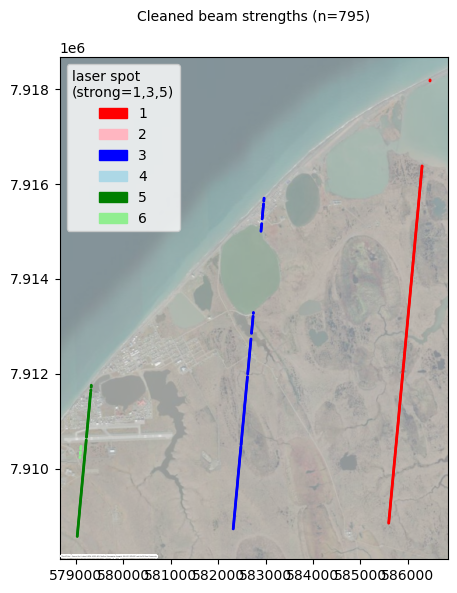

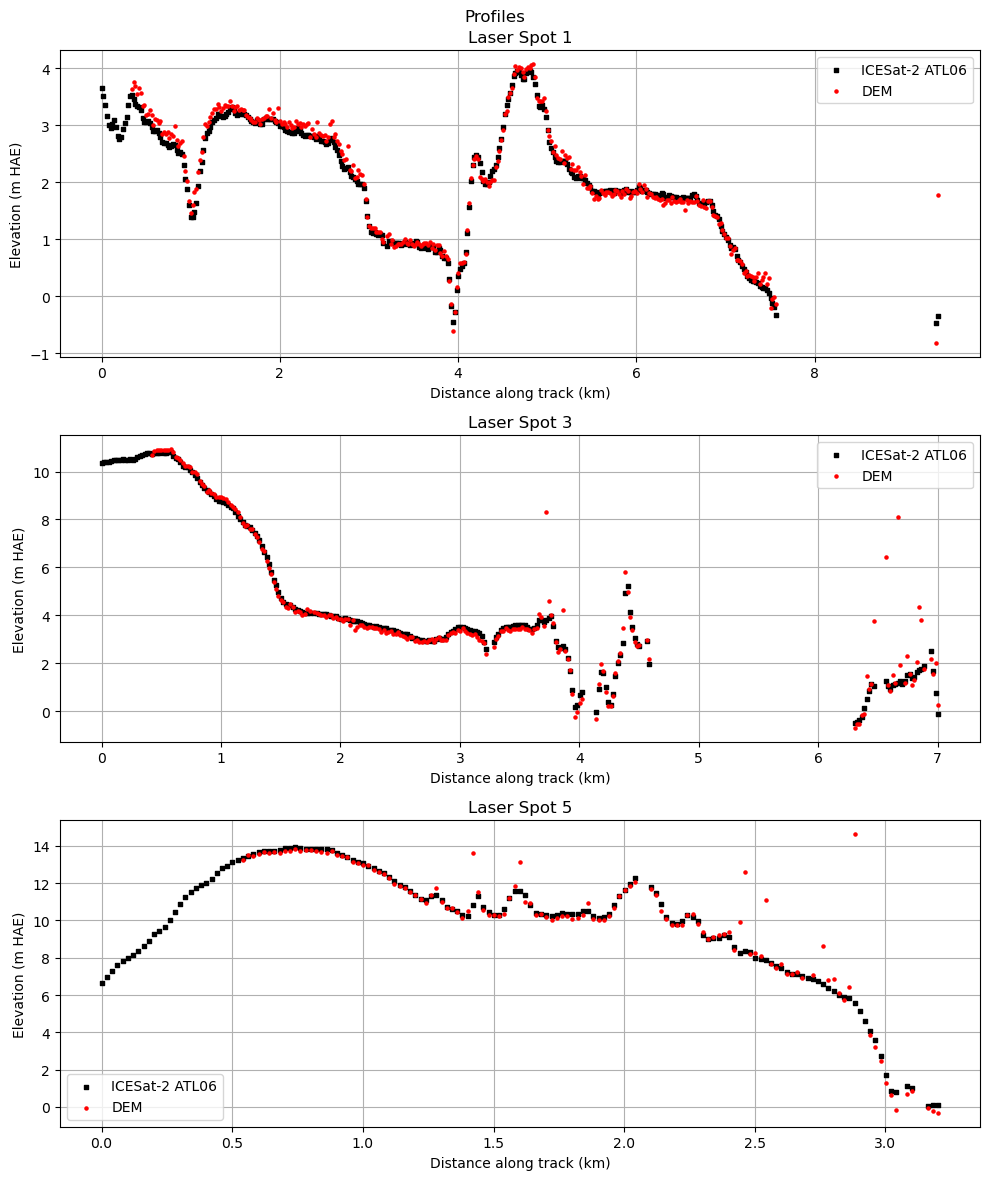

In [ ]:
icesat.plot_atl06sr(
    title=f"Cleaned beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    plot_dem=False,
    map_crs=map_crs,
    **ctx_kwargs
)

icesat.plot_atl06sr_dem_profiles(title="Profiles", only_strong_beams=True)